In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPool2D

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
mnist = input_data.read_data_sets("./MNIST_data", one_hot=True)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
train_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.train.images])
test_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.test.images])

train_labels = mnist.train.labels
test_labels = mnist.test.labels

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

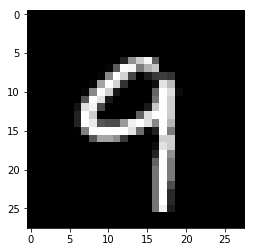

In [6]:
plt.gray()
plt.axis('off')
plt.imshow(train_xdata[8,:,:].reshape(28,28))

In [7]:
print(train_xdata.shape)
print(train_labels.shape)
print(test_xdata.shape)
print(test_labels.shape)

(55000, 28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
model = Sequential()
#Set of Conv Layer1
model.add(Conv2D(32, kernel_size = (4,4), activation ="relu", input_shape=(28,28,1)
                 #32 : Filter 개수!
                ))
model.add(MaxPool2D(pool_size = (2,2)))

#Set of conv Layer2
model.add(Conv2D(64, kernel_size=(4,4), activation='relu', input_shape = (14,14,32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#Affine Layer1
model.add(Dropout(0.25)) #dropout
model.add(Dense(128,activation = 'relu'))

#Affine Layer2
model.add(Dropout(0.5)) #dropout
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [9]:
model.fit(train_xdata, train_labels, batch_size=batch_size, epochs=2, verbose = 1)

Epoch 1/2
36096/55000 [==================>...........] - ETA: 6:03 - loss: 0.4680 - acc: 0.8485

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_xdata, test_labels, verbose = 0)
mypred = model.predict(test_xdata)

In [ ]:
Nrow = 3
Ncol = 4

for i in range(12) :
    plt.subplot(Nrow, Ncol, i+1)
    plt.imshow(test_xdata[i].reshape(28,28))


In [ ]:
mypred1 = np.argmax(mypred[0:12,], axis = 1)
actual1 = np.argmax(test_labels[0:12,], axis = 1)

np.where(np.equal(actual1,mypred1)==False)